<a href="https://colab.research.google.com/github/marinanastas/telegrams/blob/main/code/text_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Подготовка данных и библиотек

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import re
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
fname = '/content/drive/MyDrive/___МАГИСТРАТУРА/телеграммы/TELEGRAMMA/python/БД все телеграммы_1.xlsx'
df = pd.read_excel(fname)

Функция для поиска нестандартной разметки и её применение на нашем датасете

In [ ]:
regulars = ['\{[а-яёА-ЯЁ\-]+\}', '\*[а-яёА-ЯЁ\-]+\*', '\<[а-яёА-ЯЁ\-]+\>', '\^[а-яёА-ЯЁ\-]+\^', '\&[а-яёА-ЯЁ\-]+\&']
col_names = ['pre_rev', 'ortho', 'typo', 'abbr', 'graph']

In [ ]:
def searchtool(phrase, key, col):
  phrase = str(phrase)
  vals = 0
  if re.search(key, phrase) is not None:
    vals = 1
  return vals

In [ ]:
for i, key in enumerate(regulars):
  #print(len(key))
  col = col_names[i]
  df[col] = df['text'].apply(searchtool, args = (key, col))

In [ ]:
def year_assignment(date):
  year = ''
  date = str(date)
  if len(date.split('.')) !=3:
   year = 'xxxx'
  else:
    year = date.split('.')[2]
  return year

In [ ]:
df['year'] = df['date'].apply(year_assignment) 
df[col_names].groupby(df['year']).sum()

,pre_rev,ortho,typo,abbr,graph
year,,,,,
1877,34,4,0,2,0
1880,0,0,0,0,0
1882,1,0,0,1,0
1883,1,0,0,0,0
1885,0,0,0,0,0
...,...,...,...,...,...
2012,0,0,0,0,0
2013,0,0,0,0,0
2014,0,0,0,0,0


In [ ]:
results = pd.DataFrame()
results['total'] = df['year'].groupby(df['year']).count()
results = pd.concat([results, df[col_names].groupby(df['year']).sum()], axis = 1)

Доля каждого типа нестандартной разметки в общем числе телеграмм (с графиком)

In [ ]:
summa = len(df)
the_sums = [summa, summa, summa, summa, summa]
precs = df[col_names].sum()
spdif = the_sums - precs
spdif.index
perc = round(precs*100/the_sums, 2)
perc

pre_rev     9.97
ortho       9.11
typo       14.09
abbr        2.97
graph       0.58
dtype: float64

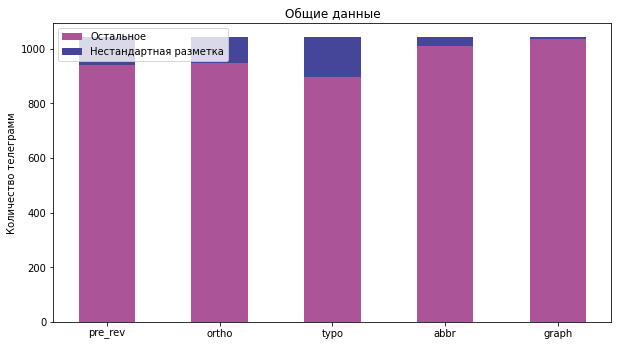

In [ ]:
fig, ax = plt.subplots()

plt.rcParams["figure.figsize"] = (10,5.5)
width = 0.5

ax.bar(spdif.index, spdif, width, label='Остальное', color = '#ab5598')
ax.bar(spdif.index, precs, width, bottom=spdif,
       label='Нестандартная разметка', color = '#454599')

ax.set_ylabel('Количество телеграмм')
ax.set_title('Общие данные')
ax.legend()

fig.show()
plt.savefig('/content/drive/MyDrive/___МАГИСТРАТУРА/телеграммы/TELEGRAMMA/python/total_vs_special')

Распределение телеграмм с дореволюционной орфографией в отношении к общему числу по годам

In [ ]:
results[results['pre_rev'] > 0]

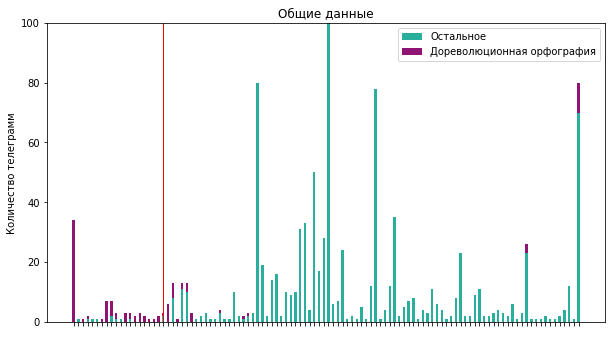

In [ ]:
fig, ax = plt.subplots()

plt.rcParams["figure.figsize"] = (10,5.5)
width = 0.5

results['Разность'] = results['total']- results['pre_rev']

ax.bar(results.index, results['Разность'], width, label='Остальное', color = '#2baf9d')
ax.bar(results.index, results['pre_rev'], width, bottom=results['Разность'],
       label='Дореволюционная орфография', color = '#901473')

plt.axvline(x = '1917', color="red", linewidth = 1)
plt.xticks(color = 'w')
ax.set_ylabel('Количество телеграмм')
ax.set_title('Общие данные')
ax.legend()

fig.show()
plt.savefig('/content/drive/MyDrive/___МАГИСТРАТУРА/телеграммы/TELEGRAMMA/python/pre_rev')

Распределение телеграмм с аббревиатурами в отношении к общему числу по годам



In [ ]:
results[results['ortho'] > 0]

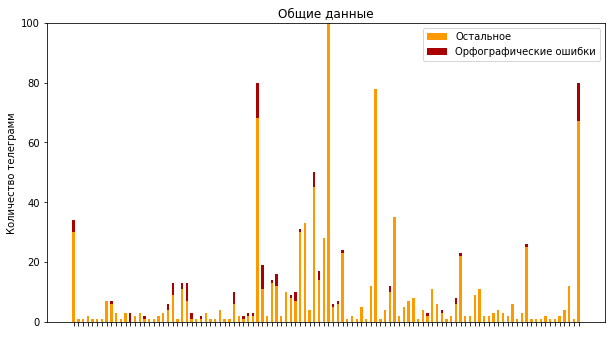

In [ ]:
fig, ax = plt.subplots()

plt.rcParams["figure.figsize"] = (10,5.5)
width = 0.5

results['Разность'] = results['total']- results['ortho']

ax.bar(results.index, results['Разность'], width, label='Остальное', color = '#ff9900')
ax.bar(results.index, results['ortho'], width, bottom=results['Разность'],
       label='Орфографические ошибки', color = '#aa0000')

#plt.axvline(x = '1917', color="red", linewidth = 1)
plt.xticks(color = 'w')
ax.set_ylabel('Количество телеграмм')
ax.set_title('Общие данные')
ax.legend()

fig.show()
plt.savefig('/content/drive/MyDrive/___МАГИСТРАТУРА/телеграммы/TELEGRAMMA/python/ortho')

Аббревиатуры: у меня есть гипотеза, что во времена СССР их было больше

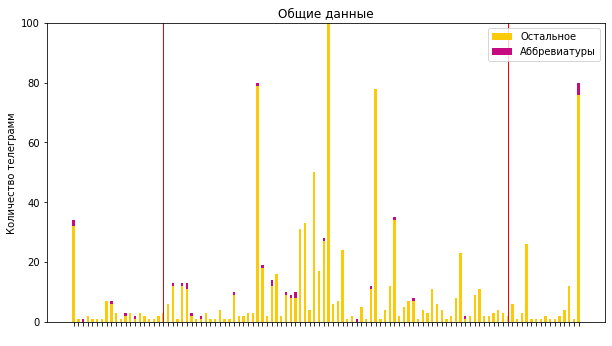

In [ ]:
fig, ax = plt.subplots()

plt.rcParams["figure.figsize"] = (10,5.5)
width = 0.5

results['Разность'] = results['total']- results['abbr']

ax.bar(results.index, results['Разность'], width, label='Остальное', color = '#FBCB0A')
ax.bar(results.index, results['abbr'], width, bottom=results['Разность'],
       label='Аббревиатуры', color = '#C70A80')

plt.axvline(x = '1917', color="red", linewidth = 1)
plt.axvline(x = '1991', color="red", linewidth = 1)
plt.xticks(color = 'w')
ax.set_ylabel('Количество телеграмм')
ax.set_title('Общие данные')
ax.legend()

fig.show()
plt.savefig('/content/drive/MyDrive/___МАГИСТРАТУРА/телеграммы/TELEGRAMMA/python/abbr')

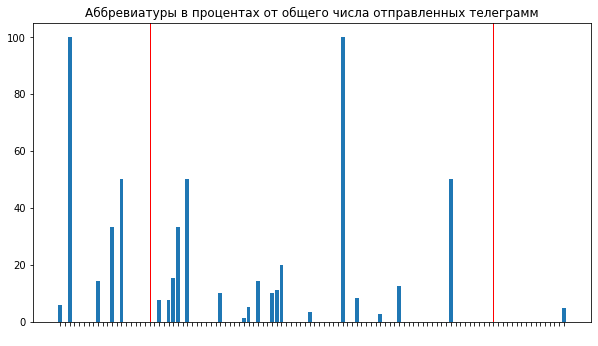

In [ ]:
plt.get_cmap("viridis")
plt.rcParams["figure.figsize"] = (10,5.5)
X = results.index
Y = round(results['abbr']*100/(results['total']+0.00001), 2)
fig, ax = plt.subplots()
ax.bar(X,Y)

plt.axvline(x = '1917', color="red", linewidth = 1)
plt.axvline(x = '1991', color="red", linewidth = 1)

plt.xticks(color = 'w')
ax.set_title('Аббревиатуры в процентах от общего числа отправленных телеграмм')
fig.show()
plt.savefig('/content/drive/MyDrive/___МАГИСТРАТУРА/телеграммы/TELEGRAMMA/python/abbr_perc')

Облака слов по тематике

У нас выделяется пять тематических групп: будничные телеграммы, военно-политические, личные поздравления, государственные праздники и устаревшие праздники. Телеграммы с темой "без данных"

In [ ]:
def nonans(t):
  if type(t) is float:
    t = 'нет данных'
  return t

In [ ]:
decthem = df[['text', 'date', 'theme']]
decthem['theme'] = decthem['theme'].apply(nonans)
themes = decthem['theme'].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
topics = []
for theme in themes:
  theme = str(theme).split(', ')
  for t in theme:
    if t not in topics:
      topics.append(t)

In [ ]:
topic_to_topic = {'день рождения':'личные поздравления',
  'поздравление':'личные поздравления',
  'восьмое марта':'государственные праздники',
  'новый год':'государственные праздники',
  'просьба':'будничные телеграммы',
  'требование':'будничные телеграммы',
  'долг':'будничные телеграммы',
  'новости':'будничные телеграммы',
  'свадьба':'личные поздравления',
  'благодарность':'будничные телеграммы',
  'угроза':'будничные телеграммы',
  'предупреждение':'будничные телеграммы',
  'пожелание':'будничные телеграммы',
  'день целинника':'устаревшие праздники',
  'рождение ребенка':'личные поздравления',
  'присвоение звания':'личные поздравления',
  'получение награды':'личные поздравления',
  'одобрение':'будничные телеграммы',
  'приглашение':'будничные телеграммы',
  'первое мая':'государственные праздники',
  'уведомление':'будничные телеграммы',
  'деньги':'будничные телеграммы',
  'годовщина октябрьской революции':'устаревшие праздники',
  'день города':'государственные праздники',
  'приветствие':'будничные телеграммы',
  'день шахтера':'устаревшие праздники',
  'годовщина советской армии':'устаревшие праздники',
  'трудовое достижение':'личные поздравления',
  'военная':'военно-политические',
  'соболезнование':'будничные телеграммы',
  'вопрос':'будничные телеграммы',
  'девятое мая':'государственные праздники',
  'открытие съезда комсомола':'устаревшие праздники',
  'обещание':'будничные телеграммы',
  'смерть':'будничные телеграммы',
  'начало учебного года':'личные поздравления',
  'манифест':'военно-политические',
  'политика':'военно-политические',
  'осуждение':'будничные телеграммы',
  'вызов':'военно-политические',
  'возражение':'будничные телеграммы',
  'день советской армии':'устаревшие праздники'}

In [ ]:
def topic_to_theme(topic):
  tt = 'нет данных'
  topic = topic.split(', ')
  for top in topic:
    if top in topic_to_topic:
      tt = topic_to_topic[top]
  return tt

In [ ]:
decthem['theme_corr'] = decthem['theme'].apply(topic_to_theme)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
def nonans_2(t):
  if type(t) is float:
    t = ''
  return t

In [ ]:
personal_dates = ' '.join(decthem['text'][decthem['theme_corr'] == 'личные поздравления'].apply(nonans_2))
public_holidays = ' '.join(decthem['text'][decthem['theme_corr'] == 'государственные праздники'].apply(nonans_2))
mundane = ' '.join(decthem['text'][decthem['theme_corr'] == 'будничные телеграммы'].apply(nonans_2))
old_holidays = ' '.join(decthem['text'][decthem['theme_corr'] == 'устаревшие праздники'].apply(nonans_2))
politics = ' '.join(decthem['text'][decthem['theme_corr'] == 'военно-политические'].apply(nonans_2))

In [ ]:
import re

In [ ]:
with open('/content/drive/MyDrive/___МАГИСТРАТУРА/телеграммы/TELEGRAMMA/python/na-stas/personal_dates.txt', 'w') as f:
  f.write(personal_dates)
with open('/content/drive/MyDrive/___МАГИСТРАТУРА/телеграммы/TELEGRAMMA/python/na-stas/public_holidays.txt', 'w') as f:
  f.write(public_holidays)
with open('/content/drive/MyDrive/___МАГИСТРАТУРА/телеграммы/TELEGRAMMA/python/na-stas/mundane.txt', 'w') as f:
  f.write(mundane)
with open('/content/drive/MyDrive/___МАГИСТРАТУРА/телеграммы/TELEGRAMMA/python/na-stas/old_holidays.txt', 'w') as f:
  f.write(old_holidays)
with open('/content/drive/MyDrive/___МАГИСТРАТУРА/телеграммы/TELEGRAMMA/python/na-stas/politics.txt', 'w') as f:
  f.write(politics)